## This is some rough pseudo code for algorithm ideas I have for my Master's research work.

### Three main algorithms-rough structure/package implementation ideas for each.

In [4]:
#import relevant packages
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score #(?)
import matplotlib.pyplot as plt
import pandas as pd

# Pre-processing the data

In [ ]:
#load in the data
#assuming a set of spectra can be represented in the form of a pd dataframe
    #where each row is a spectrum, each column is a flux value.

df = #load data here

In [ ]:
#apply some kind of standardization across the fluxes?
scaler = StandardScaler
df = scaler.fit_transform(df)

X = df

# Algorithm 1: "Basic" Clustering


A basic agglomerative clustering algorithm.

- determine the optimal number of clusters using either a silhouette score or dendrogram visualization
- deploy optimal clustering algorithm
- apply a PCA decomp to retrieve feature space
- visualize results
- analyze key features of average spectra in each cluster- groupby, plots of each averaged spectra, etc

In [ ]:
# explore the appropriate number of clusters to use
n_cluster_range = [4,6,8,10,15] #a range of clusters to explore

for n_cluster in n_cluster_range:
    # initialize the clusterer with n_clusters and a random_seed for reproducability
    clusterer = KMeans(n_clusters = n_clusters) #or AgglomerativeClustering(n_clusters, random_seed)
    # generate cluster labels
    cluster_labels = clusterer.fit_predict(X)
    
    #calculate silhouette scores
    
    #generate silhouette plot
        # see code in CS4414B/Assignment_Week11-Clean
        

optimal_clusters = # analyze silhouette plot for the optimal number of clusters.
    

In [1]:
# perform PCA on data in order to retreive parameter-space dimensions
pca = PCA(n_components = 2) # use 2 from Ameek's paper- could also experiment with others...
X_pca = pca.fit_transform(X)

#apply clustering algorithm with chosen number of clusters and plot results

#initialize the figure
fig, axs = plt.subplots(1,1)

clusterer = #the chosen clustering algorithm
cluster_labels = clusterer.fit_predict(X)

#plot in pc space, color-code by cluster
for i in range(optimal_clusters):
    color = cm.nipy_spectral(float(i) / optimal_clusters)
    plt.scatter(X_pca[cluster_labels==i, 0], X_pca[cluster_labels==i, 1], 
                label='Cluster %i' % (i+1))

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA-transformed plot for %i clusters' % n_clusters)
plt.legend()


SyntaxError: invalid syntax (<ipython-input-1-545c4191689a>, line 10)

# Algorithm 2 : "Enhanced Clustering 1"

Agglomerative clustering algorithm except the output is passed as input to KMeans clustering to serve as initial centroid positions.
- determine the optimal number of clusters using either a silhouette score or dendrogram visualization
- deploy agglomerative clustering with optimal number of clusters
- deploy KMeans clustering with K=optimal_number_of_cluster and initialize positions at output from agglomerative clustering algorithm
- sanity check- (re-?)calculate silhouette score for clusters and compare with agglomerative partitions
- apply a PCA decomp to retrieve feature space
- visualize results
- analyze key features of average spectra in each cluster- groupby, plots of each averaged spectra, etc

In [12]:
##just playing around with some toy data to experiment with how to consolidate
#using the output labels from agglomerative clustering as input to kmeans
X=pd.read_csv("RFM_data.csv")
clusterer= AgglomerativeClustering(n_clusters=5)
cluster_labels= clusterer.fit_predict(X)
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X)
print(clusterer.labels_.shape)
print(X_pca.shape)

(1000,)
(1000, 2)


In [14]:
#playing with centroid calculation
from sklearn.neighbors import NearestCentroid
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])
clf = NearestCentroid()
clf.fit(X, y)

print(clf.centroids_)
# [[-2.         -1.33333333]
#  [ 2.          1.33333333]]



[[-2.         -1.33333333]
 [ 2.          1.33333333]]


[-1.33333333  1.33333333]


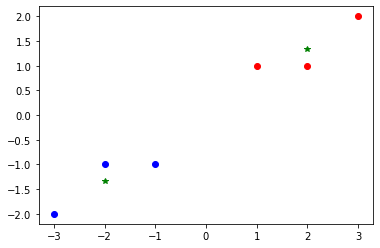

In [31]:
x_coords=X[:,0]
y_coords=X[:,1]

#plot the points themselves
plt.plot(x_coords[0:3], y_coords[0:3], 'o',color='blue')
plt.plot(x_coords[3:], y_coords[3:], 'o', color='red' )

#plot the centroids
x_cent=clf.centroids_[:,0]
y_cent=clf.centroids_[:,1]

print(y_cent)

plt.plot(x_cent, y_cent, '*', color='green')
plt.show()

# Algorithm 3: "Enhanced Clustering 2"

Agglomerative clustering based on input from a computed RF dissimilarity score (Euclidean analog)
- determine the optimal number of clusters using either a silhouette score or dendrogram visualization
- generate a synthetic "dataset" based on marginal distributions of real data, apply labels to both sets
- train RFClassifier on both sets (real=1)
- calculate similarity score->dissimilarity score
- deploy agglomerative clustering with dissimilarity score as input (??have to look more into this specific step/implementation)
- apply a PCA decomp to retrieve feature space
- visualize results
- analyze key features of average spectra in each cluster- groupby, plots of each averaged spectra, etc